In [1]:
import cmocean.cm as cm
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import xarray as xr
from salishsea_tools import visualisations as vis
from salishsea_tools import viz_tools

%matplotlib inline

In [2]:
mesh = nc.Dataset('/home/sallen/MEOPAR/grid/mesh_mask201702.nc')
bathy = nc.Dataset('/home/sallen/MEOPAR/grid/bathymetry_201702.nc')

In [3]:
imin, imax = 350, 600
jmin, jmax = 150, 350

In [4]:
def make_plots(fig, ax, variable, name, ng, hd, cmap, vmaxm, vminm):
    green = np.array(ng.variables[variable][0])
    hind = np.array(hd.variables[variable][0])

    colors = axs[0, 0].pcolormesh(green[0, imin:imax, jmin:jmax], cmap=cmap, vmax=vmaxm, vmin=vminm)
    fig.colorbar(colors, ax=axs[0, 0], extend='both')

    colors = axs[0, 1].pcolormesh(hind[0, imin:imax, jmin:jmax], cmap=cmap, vmax=vmaxm, vmin=vminm)
    fig.colorbar(colors, ax=axs[0, 1], extend='both')

    vmax = 0.5*np.nanmax(np.absolute(hind - green))
    print(vmax)
    colors = axs[0, 2].pcolormesh(hind[0, imin:imax, jmin:jmax] - green[0, imin:imax, jmin:jmax], cmap='bwr', vmax=vmax, vmin=-vmax)
    fig.colorbar(colors, ax=axs[0, 2], extend='both')

    for ax in [axs[0, 0], axs[0, 1], axs[0, 2]]:
        viz_tools.set_aspect(ax)
  
    for i in range(1, 3):
        cbar = vis.contour_thalweg(axs[i, 0], green, bathy, mesh, np.arange(vminm, 1.05*vmaxm, 0.1*(vmaxm-vminm)), cmap=cmap)
        cbar = vis.contour_thalweg(axs[i, 1], hind, bathy, mesh, np.arange(vminm, 1.05*vmaxm, 0.1*(vmaxm-vminm)), cmap=cmap)
        cbar = vis.contour_thalweg(axs[i, 2], hind-green, bathy, mesh, np.arange(-0.9*vmax, vmax, 0.1*vmax), cmap='bwr')
    for ax in [axs[2, 0], axs[2, 1], axs[2, 2]]:
        ax.set_ylim((20, 0))
        ax.set_xlim((300, 500))
        
    axs[0,0].set_title('Nowcast Green')
    axs[0,1].set_title('New Hindcast')
    axs[0,2].set_title('Hindcast-NowcastGreen')

# Monthly Averaged Physics (Dec 2014)

In [5]:
hd = xr.open_dataset('hd_dec14_mean_grid_T.nc')
h2 = xr.open_dataset('h2_dec14_mean_grid_T.nc')

0.213754653931


/home/sallen/anaconda/envs/py3/lib/python3.5/site-packages/matplotlib/colors.py:581: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


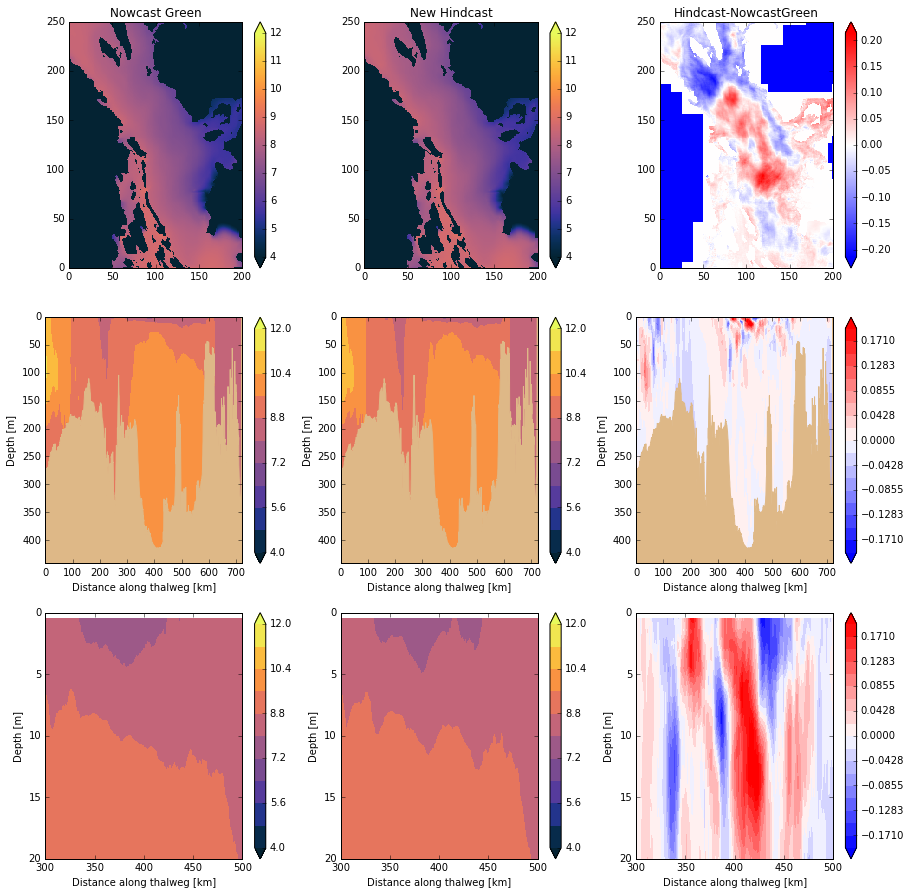

In [6]:
variable, name, cmap = 'votemper', 10, cm.thermal
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
make_plots(fig, axs, variable, name, hd, h2, cmap, 12, 4)

0.423251152039


/home/sallen/anaconda/envs/py3/lib/python3.5/site-packages/matplotlib/colors.py:581: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


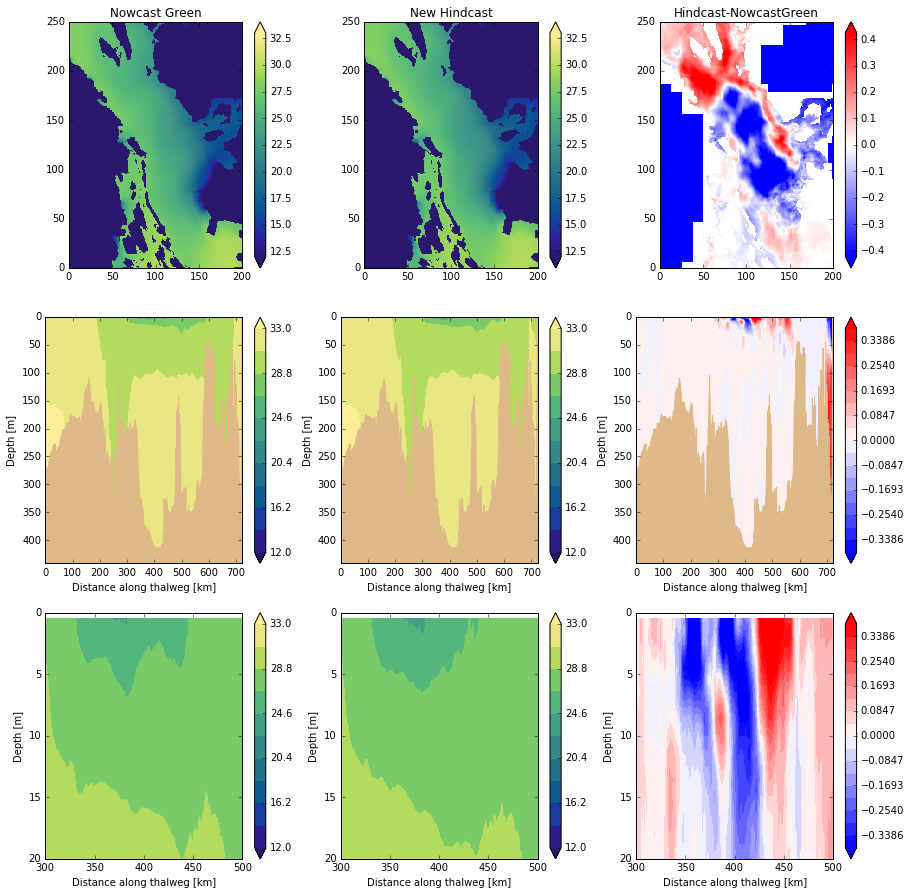

In [7]:
variable, name, cmap = 'vosaline', 'salinity', cm.haline
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
make_plots(fig, axs, variable, name, h2, hd, cmap, 33, 12)

# Monthly Averaged Biology (Dec 2014)

In [8]:
hd = xr.open_dataset('hd_dec14_mean_ptrc_T.nc')
h2 = xr.open_dataset('h2_dec14_mean_ptrc_T.nc')

8.90092515945


/home/sallen/anaconda/envs/py3/lib/python3.5/site-packages/matplotlib/colors.py:581: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


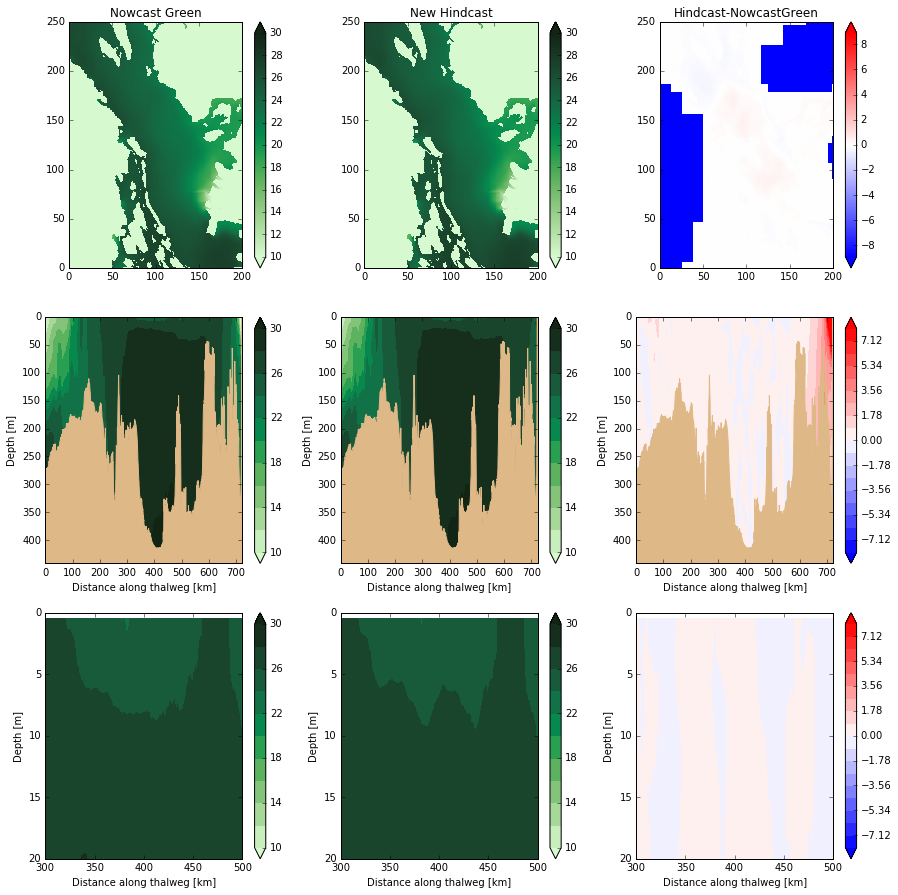

In [9]:
variable, name, cmap = 'nitrate', 10, cm.algae
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
make_plots(fig, axs, variable, name, hd, h2, cmap, 30, 10)

10.2336883545


/home/sallen/anaconda/envs/py3/lib/python3.5/site-packages/matplotlib/colors.py:581: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


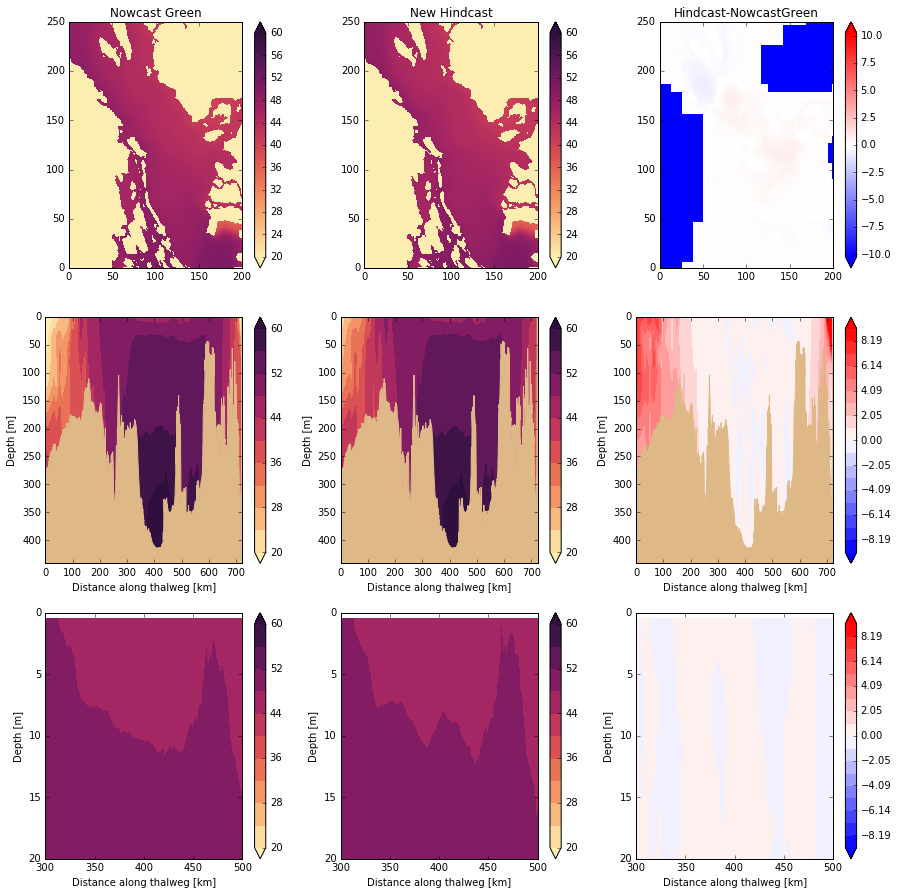

In [10]:
variable, name, cmap = 'silicon', 10, cm.matter
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
make_plots(fig, axs, variable, name, hd, h2, cmap, 60, 20)

0.0783360600471


/home/sallen/anaconda/envs/py3/lib/python3.5/site-packages/matplotlib/colors.py:581: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


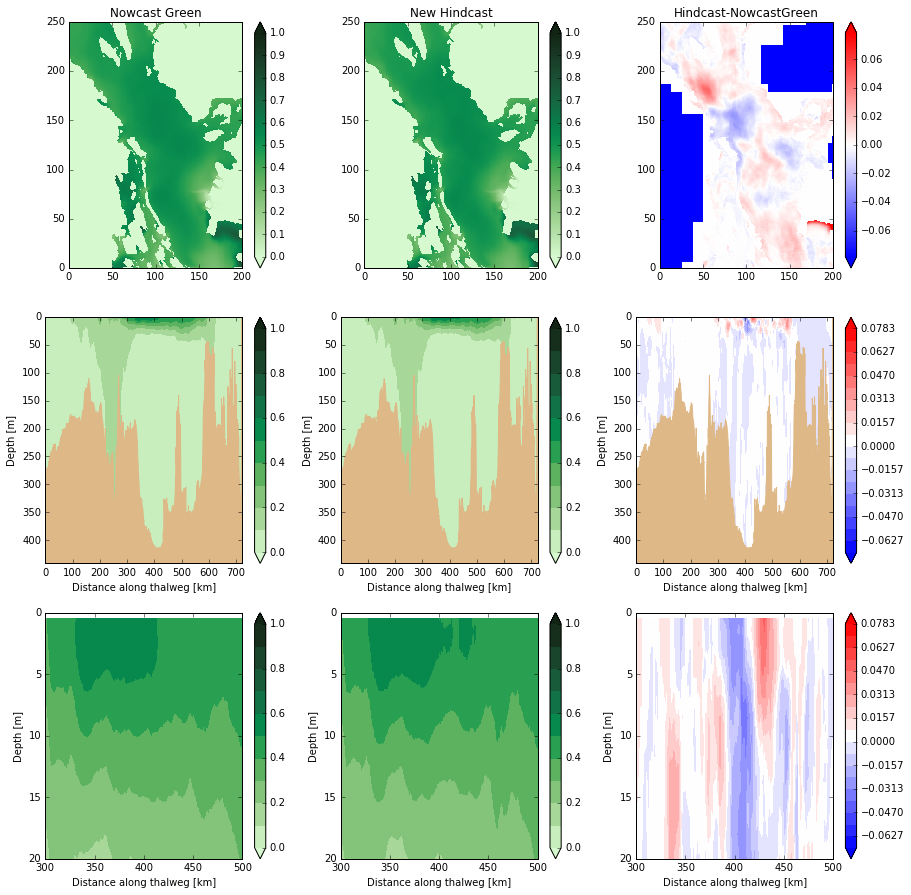

In [11]:
variable, name, cmap = 'diatoms', 10, cm.algae
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
make_plots(fig, axs, variable, name, hd, h2, cmap, 1, 0)

0.038475394249


/home/sallen/anaconda/envs/py3/lib/python3.5/site-packages/matplotlib/colors.py:581: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


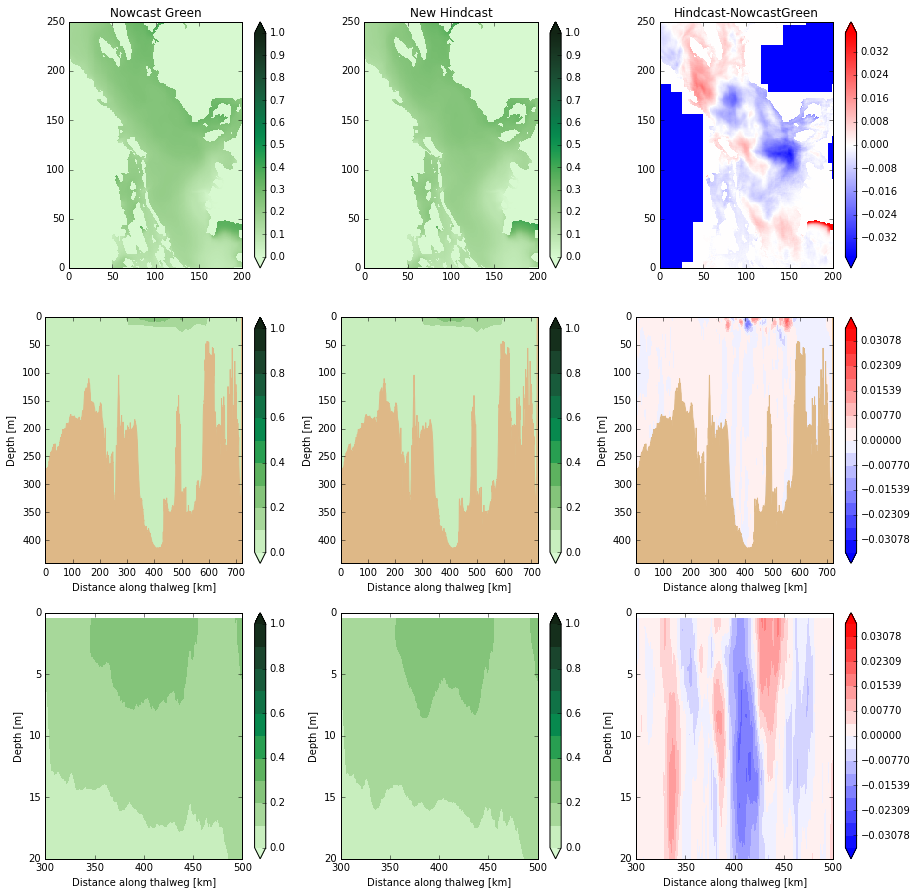

In [12]:
variable, name, cmap = 'flagellates', 10, cm.algae
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
make_plots(fig, axs, variable, name, hd, h2, cmap, 1, 0)

0.00985325872898


/home/sallen/anaconda/envs/py3/lib/python3.5/site-packages/matplotlib/colors.py:581: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


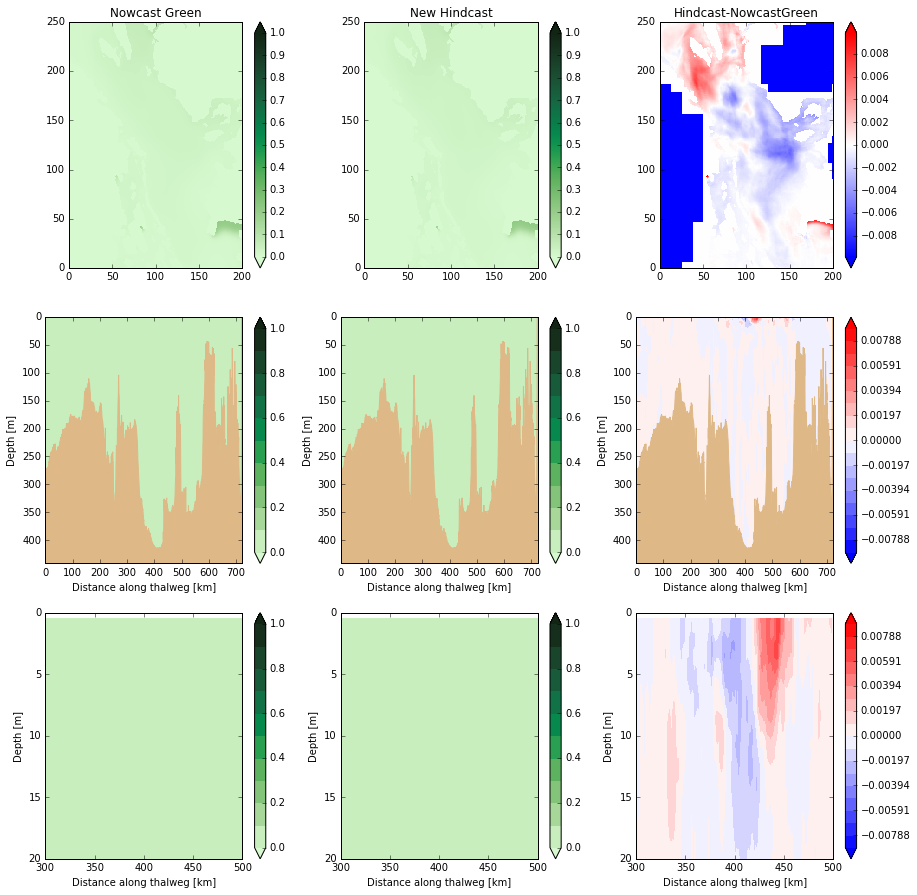

In [13]:
variable, name, cmap = 'ciliates', 10, cm.algae
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
make_plots(fig, axs, variable, name, hd, h2, cmap, 1, 0)

0.00262691825628


/home/sallen/anaconda/envs/py3/lib/python3.5/site-packages/matplotlib/colors.py:581: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


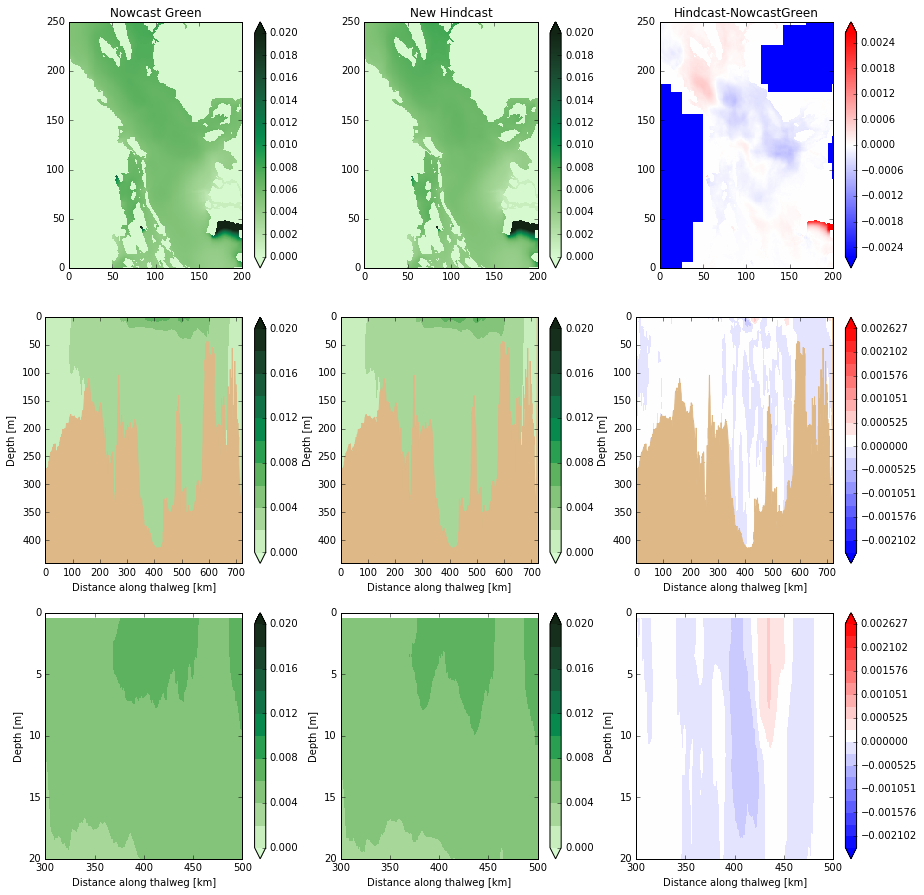

In [14]:
variable, name, cmap = 'microzooplankton', 10, cm.algae
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
make_plots(fig, axs, variable, name, hd, h2, cmap, 0.02, 0)

# Monthly Averaged Carbon (Dec 2014)

In [15]:
h2 = xr.open_dataset('h2_dec14_mean_carp_T.nc')

/home/sallen/anaconda/envs/py3/lib/python3.5/site-packages/matplotlib/colors.py:581: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


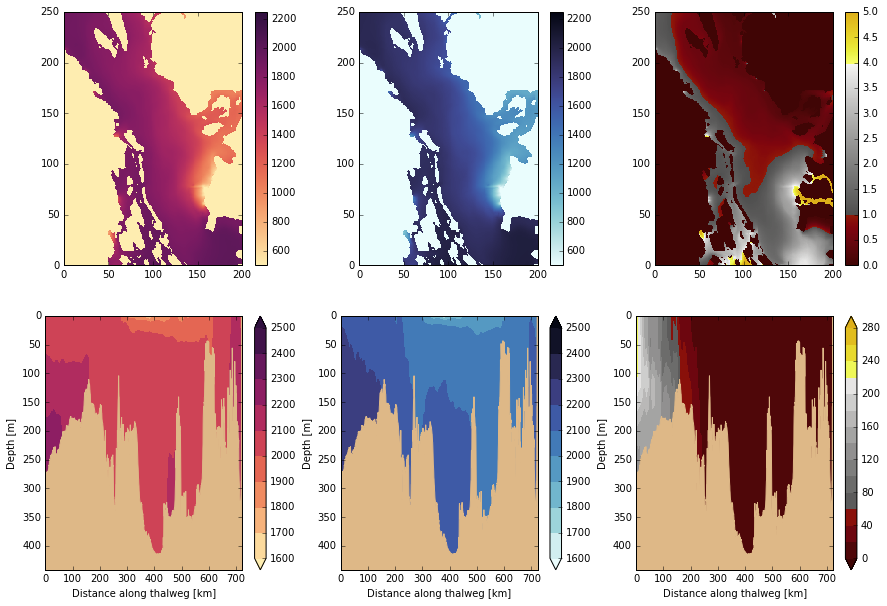

In [30]:
fig, axs = plt.subplots(2, 3, figsize = (15, 10))

colors = axs[0, 0].pcolormesh(h2['dissolved_inorganic_carbon'][0, 0, imin:imax, jmin:jmax], cmap=cm.matter, vmax=2250, vmin=500)
fig.colorbar(colors, ax=axs[0, 0])

colors = axs[0, 1].pcolormesh(h2['total_alkalinity'][0, 0, imin:imax, jmin:jmax], cmap=cm.ice_r, vmax=2250, vmin=500)
fig.colorbar(colors, ax=axs[0, 1])

colors = axs[0, 2].pcolormesh(h2['dissolved_oxygen'][0, 0, imin:imax, jmin:jmax], cmap=cm.oxy, vmax=5, vmin=0)
fig.colorbar(colors, ax=axs[0, 2])

for ax in [axs[0, 0], axs[0, 1], axs[0, 2]]:
    viz_tools.set_aspect(ax)
  
cbar = vis.contour_thalweg(axs[1, 0], np.array(h2['dissolved_inorganic_carbon'][0]), bathy, mesh, np.arange(1600, 2600, 100), cmap=cm.matter)
cbar = vis.contour_thalweg(axs[1, 1], np.array(h2['total_alkalinity'][0]), bathy, mesh, np.arange(1600, 2600, 100), cmap=cm.ice_r)
cbar = vis.contour_thalweg(axs[1, 2], np.array(h2['dissolved_oxygen'][0]), bathy, mesh, 15, cmap=cm.oxy)
